Andrea Giraldo-Puerta #programming Assig. 2

# MA 544 - Programming Assignment - 3
---


In [67]:
#Import required packages here
import numpy as np

## Question 1


Modify the textual data example from NB1 to convert the document-term matrix into TF-IDF (term-frequency inverse document frequency) matrix by using <span style="color:blue">basic NumPy operations</span>.
> **Term-frequency (TF)** (of a word in a document) is frequency of the word in a document divided by total number of words in the document.

> **Inverse document frequency (IDF)** of a word (all documents under consideration) is the natural log of (total number of documents/number of documents having the given word).
$$\text{tf-idf}(t, d) = \text{tf}(t,d) \cdot \text{idf}(t) $$
See the discussion board of Module 2 for an example

Display the dense output for the tf-idf matrix for the example from NB1 MA544.ipynb.

In [69]:
# Copy and past the code from NB1 to create term-document matrix
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

## Example Documents: Amazon review of Taco vs Burrito
document1 = " I bought this game as a gift for my 8 year old daughter who loves games. I was expecting lots of gross foods--but I was surprised at the inappropriate cards--eyeball, human burger, blood salsa, and fresh brains. Those are not foods that typical people find in their refrigerators. We do not practice cannibalism. She was very upset when I suggested that we just take out those cards. I seriously wonder who thinks that those cards are appropriate for kids. The rest of the game is funny, but I wish I would have looked through the cards before I gave it to her."
document2 = "Absolutely love Taco vs burrito. I️ bought it as a kickstarter. I️ originally bought this game because my husband and I️ love to play games with friends but most of them are not targeted to children so I️ got this to add to our collection so we had options when our friends with kids came. I’m not gonna lie I️ did No have high expectations for this to be a game for adult but I️ was Sooooo wrong!!!!!! We have now played with several different groups of friends and it’s a hit!!!!! With adults it becomes a major strategy game. I️ have Now bought it as a Christmas present bc it was so well received!!!!"
document3 = " Unlike several of the reviewers here, I didn't purchase this originally for when kids are around. I bought it because of the reviews that said the adults all loved it too! I'm always on the lookout for games playable by 2 people and this was a great one. It's incredibly simple, but brings a lot of laughs with the competition and sabotage. I'm really glad I gave this game a chance."
doc_list = [document1, document2, document3]

## Create a bag of words after dropping the stop-words
vectorizer = CountVectorizer(stop_words=[ENGLISH_STOP_WORDS])
X = vectorizer.fit_transform(doc_list)
vectorizer.get_feature_names_out()
X_dense = X.toarray()
print("checking the data structure: ", type(X))
print("feature names: /n", vectorizer.get_feature_names_out())
print(X.shape)
print(X)

checking the data structure:  <class 'scipy.sparse._csr.csr_matrix'>
feature names: /n ['absolutely' 'add' 'adult' 'adults' 'all' 'always' 'and' 'appropriate'
 'are' 'around' 'as' 'at' 'bc' 'be' 'because' 'becomes' 'before' 'blood'
 'bought' 'brains' 'brings' 'burger' 'burrito' 'but' 'by' 'came'
 'cannibalism' 'cards' 'chance' 'children' 'christmas' 'collection'
 'competition' 'daughter' 'did' 'didn' 'different' 'do' 'expectations'
 'expecting' 'eyeball' 'find' 'foods' 'for' 'fresh' 'friends' 'funny'
 'game' 'games' 'gave' 'gift' 'glad' 'gonna' 'got' 'great' 'gross'
 'groups' 'had' 'have' 'her' 'here' 'high' 'hit' 'human' 'husband' 'in'
 'inappropriate' 'incredibly' 'is' 'it' 'just' 'kickstarter' 'kids'
 'laughs' 'lie' 'looked' 'lookout' 'lot' 'lots' 'love' 'loved' 'loves'
 'major' 'most' 'my' 'no' 'not' 'now' 'of' 'old' 'on' 'one' 'options'
 'originally' 'our' 'out' 'people' 'play' 'playable' 'played' 'practice'
 'present' 'purchase' 'really' 'received' 'refrigerators' 'rest'
 'review

In [70]:
# Your code for TF 
TF = X_dense/np.sum(X_dense, axis =1, keepdims=True)
# Your code for IDF; idf(t)= N/df; df(t) = occurrence of t in N documents
num_docs = X_dense.shape[0]
doc_freq = np.sum(X_dense > 0, axis=0)
IDF = np.log(num_docs/doc_freq)

In [71]:
# Find TF-IDF matrix 
TF_IDF = TF * IDF
# Display the dense output for the example from NB1
print("TF_IDF Matrix: \n", TF_IDF)

TF_IDF Matrix: 
 [[0.         0.         0.         0.         0.         0.
  0.         0.01168736 0.         0.         0.00431346 0.01168736
  0.         0.         0.         0.         0.01168736 0.01168736
  0.         0.01168736 0.         0.01168736 0.         0.
  0.         0.         0.01168736 0.04674946 0.         0.
  0.         0.         0.         0.01168736 0.         0.
  0.         0.01168736 0.         0.01168736 0.01168736 0.01168736
  0.02337473 0.         0.01168736 0.         0.01168736 0.
  0.         0.00431346 0.01168736 0.         0.         0.
  0.         0.01168736 0.         0.         0.00431346 0.01168736
  0.         0.         0.         0.01168736 0.         0.01168736
  0.01168736 0.         0.01168736 0.         0.01168736 0.
  0.         0.         0.         0.01168736 0.         0.
  0.01168736 0.         0.         0.01168736 0.         0.
  0.00431346 0.         0.00862692 0.         0.         0.01168736
  0.         0.         0.         

---
## Question 2

IRIS flower dataset is one of the widely used resources. Load the IRIS data by using the following code

>- Normalize this data by using z-scoring. 
$$\mathbf{z}  = \frac{\mathbf{x} - \mu}{\sigma}$$ 
Don't use loops. You can use np.mean() for $\mu$, np.std() for $\sigma$ and only basic matrix operations with broadcasting. 

>- Visualize the distribution of the normalized data (histograms, boxplots) using Matplotlib or other packages. 

In [73]:
#x: Original value
#μ: Mean of data
#σ: Standard deviation of data
# Python code
from sklearn import datasets
iris = datasets.load_iris().data
print(iris.shape)

(150, 4)


In [74]:
## Your code for normalization
mean = np.mean(iris)
std_dev = np.std(iris)
z = (iris - mean) / std_dev
print("Original data: ", iris)
print("Mean: ", mean)
print("Standard deviation of data: ", std_dev)
print("Z-scoring: ", z)

Original data:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1

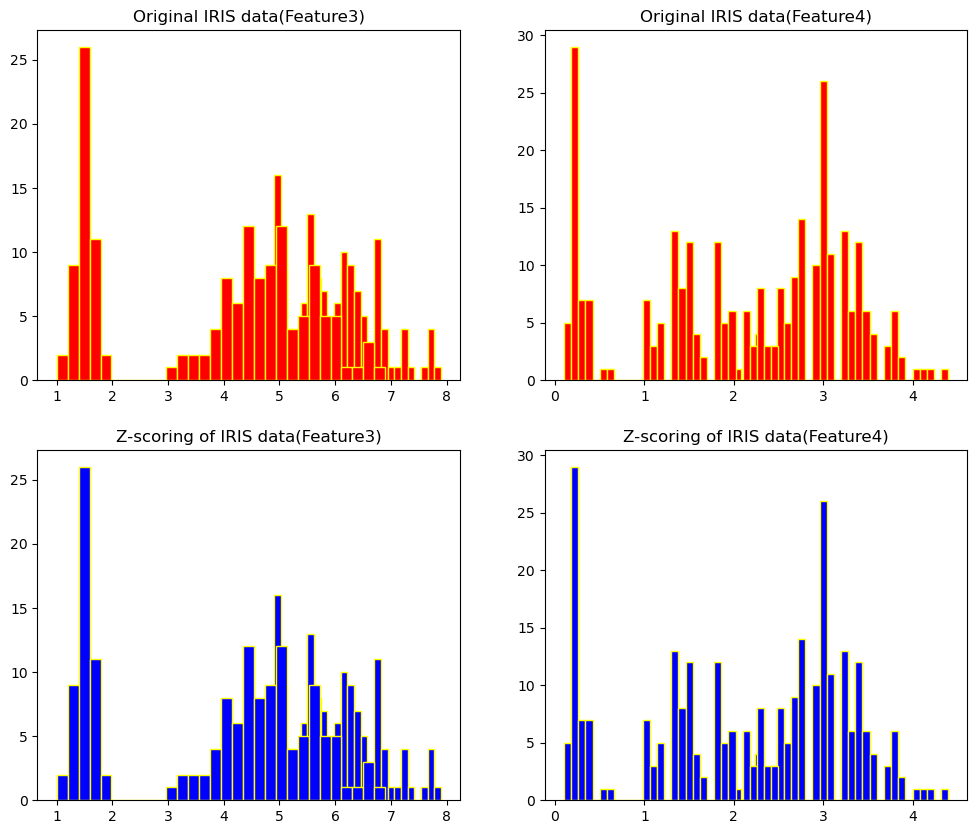

In [75]:
## Your code for visualization
import matplotlib.pyplot as plt
fig, axs= plt.subplots(2,2, figsize=(12,10))
for i in range(iris.shape[1]):
    axs[0,i%2].hist(iris[:,i], bins=30, color='red', edgecolor='yellow')
    axs[0,i%2].set_title(f'Original IRIS data(Feature{i+1})')
for i in range(iris.shape[1]):
    axs[1,i%2].hist(iris[:,i], bins=30, color='blue', edgecolor='yellow')
    axs[1,i%2].set_title(f'Z-scoring of IRIS data(Feature{i+1})')
plt.show()

## Question 3

Modify the following code for Gauss-Seidel iteration to answer the questions below.

In [77]:
import numpy as np

# You can modify this code to answer the following
'''
Jacobi's iteration method for solving the system of equations Ax=b.
p0 is the initialization for the iteration.
'''
def jacobi(A, b, p0, tol, maxIter=100):
    n=len(A)
    p = p0

    for k in range(maxIter):
        p_old = p.copy() # In python assignment is not the same as copy
        
        # Update every component of iterant p
        for i in range(n):
            sumi = b[i];
            for j in range(n):
                if i==j: # Diagonal elements are not included in Jacobi
                    continue;
                sumi = sumi - A[i,j] * p_old[j]
            p[i] = sumi/A[i,i]
                
        rel_error = np.linalg.norm(p-p_old)/n # Actually 'n' should be replace by norm of p
        # print("Relative error in iteration", k+1,":",rel_error)
        if rel_error<tol:
            print("TOLERANCE MET BEFORE MAX-ITERATION")
            break
    return p;

In [78]:
# Example System
A = np.array([[10, -1, 2, 0],
              [-1, 11, -1, 3],
              [2, -1, 10, -1],
              [0, 3, -1, 8]],dtype=float)
b = np.array([6, 25, -11, 15],dtype=float)

In [79]:
## What will happen if the followign code runs
#x = jacobi(A,b, np.array([0,0,0,0]),0.00001, 100)

x = jacobi(A,b, np.array([0,0,0,0],dtype=float),0.0000001, 100)
print("The solution is: ",x)

TOLERANCE MET BEFORE MAX-ITERATION
The solution is:  [ 1.00000003  1.99999996 -0.99999997  0.99999995]



 (A) Implement the Gauss-Siedel Iteration in Python.  Solve the following system by using this method. Exact answer is (1,2,-1,1). Stopping criteria could be a relative $error < 0.000001$.

$$
\begin{pmatrix}
10 & -1  & 2  & 0  \\
-1 & 11&-1 & 3 \\
2 & -1  & 10  & -1 \\
0 & 3 & -1 & 8  
\end{pmatrix}
\begin{pmatrix}
x_1\\x_2\\x_3\\x_4 
\end{pmatrix}
=
\begin{pmatrix}
6\\25\\-11\\15
\end{pmatrix}
$$


In [81]:
# Your Code Starts here
def gauss_seidel(A, b, p0, tol, maxIter=100):
    n=len(A)
    p = p0

    for k in range(maxIter):
        p_old = p.copy() # In python assignment is not the same as copy
        
        # Update every component of iterant p
        for i in range(n):
            sumi = b[i];
            for j in range(n):
                if i !=j: # Diagonal elements are not included in Jacobi
                    sumi = sumi - A[i,j] * p[j]
            p[i] = sumi/A[i,i]
                
        rel_error = np.linalg.norm(p-p_old)/np.linalg.norm(p) # Actually 'n' should be replace by norm of p
        # print("Relative error in iteration", k+1,":",rel_error)
        if rel_error<tol:
            print("TOLERANCE MET AFTER {k+1} ITERATION")
            break
    return p;
A = np.array([[10, -1, 2, 0],
              [-1, 11, -1, 3],
              [2, -1, 10, -1],
              [0, 3, -1, 8]],dtype=float)
b = np.array([6, 25, -11, 15],dtype=float)

p0= np.array([0,0,0,0], dtype=float)

x_gs= gauss_seidel(A, b, p0, tol=0.000001, maxIter=100)
print("Gauss-Seidel solution: ", x_gs)

TOLERANCE MET AFTER {k+1} ITERATION
Gauss-Seidel solution:  [ 1.00000004  1.99999999 -1.00000001  1.        ]


(B) Implement Successive Over-relaxation in Python and solve the above problem again with $\omega=1.5$.

In [83]:
# Your Code Starts here
def sor(A, b, p0, tol, omega= 1.5, maxIter=100):
    n=len(A)
    p = p0

    for k in range(maxIter):
        p_old = p.copy() # In python assignment is not the same as copy
        
        # Update every component of iterant p
        for i in range(n):
            sumi = b[i];
            for j in range(n):
                if i !=j: # Diagonal elements are not included in Jacobi
                    sumi = sumi - A[i,j] * p[j]
            p[i] = sumi/A[i,i]
                
        rel_error = np.linalg.norm(p-p_old)/np.linalg.norm(p) # Actually 'n' should be replace by norm of p
        # print("Relative error in iteration", k+1,":",rel_error)
        if rel_error<tol:
            print("TOLERANCE MET AFTER {k+1} ITERATION")
            break
    return p;

x_sor = sor(A, b, p0, tol=0.000001, omega= 1.5, maxIter=100)
print("SOR solution with omega=1.5: ", x_sor)

TOLERANCE MET AFTER {k+1} ITERATION
SOR solution with omega=1.5:  [ 1.  2. -1.  1.]


## Question 4- OPTIONAL 

Use the following code for Gaussian elimination with scaled row-partial pivoting code to answer the following.

In [85]:
## Gaussian Elimination: Scaled Row Pivoting
## This function is based on the pseudo-code on page-148 in the Text by Kincaid and Cheney
def GE_rsp(A):
    '''
    This function returns the P'LU factorization of a square matrix A
    by scaled row partial pivoting. 
    In place of returning L and U, elements of modified A are used to hold values of L and U.
    '''
    m,n = A.shape
    
    L = np.eye(n) # Not being used
    U = np.zeros_like(A) # Not being used
    if m !=n:
        sys.exit("This function needs a square matrix as an input.")
        
    # The initial ordering of rows
    p = list(range(n))
    
    # Scaling vector: absolute maximum elements of each row
    s = np.max(np.abs(A), axis=1)
    
    print("Scaling Vector: ",s)
    
    # Start the k-1 passes of Guassian Elimination on A
    for k in range(n-1):
        
        print("\n PASS {}: \n".format(k+1), A)
        # Find the pivot element and interchange the rows
        pivot_index = k + np.argmax(np.abs(A[p[k:], k])/s[p[k:]])        
        
        # Interchange element in the permutation vector
        if pivot_index !=k:
            temp = p[k]
            p[k]=p[pivot_index]
            p[pivot_index] = temp
            print("permutation vector: ",p)
            
        print("\n Pivot Element: {0:.2f} \n".format(A[p[k],k]))
        if np.abs(A[p[k],k]) < 10**(-20):
             sys.exit("ERROR!! Provided matrix is non-singular.")
             
        # For the k-th pivot row Perform the Gaussian elimination on the following rows
        for i in range(k+1, n):
            # Find the multiplier
            z = A[p[i],k]/A[p[k],k]
            
            #Save z in A itself. You can save this in L also
            A[p[i],k] = z
            
            #Elimination operation: Changes all elements in a row simultaneously
            ##
            A[p[i],k+1:] -= z*A[p[k],k+1:]
    return A, p

In [86]:
## Example on page number 146 (Kincaid Cheney).
## Example solved manually in class
A = np.array([[2, 3, -6], [1,-6,8], [3, -2, 1]], dtype=float)
print("\n Given A: \n ",A)
A,p =GE_rsp(A)
print("\n After Gaussian Elimination with RSPP: \n", A)
print("\n The permutation Vector is: \n", p)


 Given A: 
  [[ 2.  3. -6.]
 [ 1. -6.  8.]
 [ 3. -2.  1.]]
Scaling Vector:  [6. 8. 3.]

 PASS 1: 
 [[ 2.  3. -6.]
 [ 1. -6.  8.]
 [ 3. -2.  1.]]
permutation vector:  [2, 1, 0]

 Pivot Element: 3.00 


 PASS 2: 
 [[ 0.66666667  4.33333333 -6.66666667]
 [ 0.33333333 -5.33333333  7.66666667]
 [ 3.         -2.          1.        ]]
permutation vector:  [2, 0, 1]

 Pivot Element: 4.33 


 After Gaussian Elimination with RSPP: 
 [[ 0.66666667  4.33333333 -6.66666667]
 [ 0.33333333 -1.23076923 -0.53846154]
 [ 3.         -2.          1.        ]]

 The permutation Vector is: 
 [2, 0, 1]


>- (A) Modify this code to write a function that solves a linear system Ax =b.  Test this in the case when   $𝑏=[3,1,1]^T$, and the matrix $A = [1~ 6 ~0; 2~ 1~ 0; 0 ~2~ 1]$. Only display the solution in the output.

In [88]:
# Your code come here

>- (B) Modify this code to find the determinant of any square matrix A. Note that 
$$PA = LU \Rightarrow \text{det} A  = \pm \text{det} U .$$
The sign depends of the number of row-swaps in the elimination process.  Use this code to find the determinant of any $10 \times 10$ matrix that you randomly generate. Compare your result with the built-in NumPy method.

In [90]:
#Your code comes here


>- (C) Modify the system-solver that you have created to find the inverse of a square matrix. Use this code to display the inverse of  A = [1 6 0; 2 1 0; 0 2 1].

In [92]:
# Your code comes here
